### Importing Libraries

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
###Reading CSV file
df = pd.read_csv("TaxiFare.csv")


In [ ]:
df.sample(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
15696,22:37.0,8.3,2009-03-02 16:22:37 UTC,-73.962485,40.758745,-73.980158,40.751677,1
35763,30:00.0,6.1,2010-03-16 07:30:00 UTC,-73.944172,40.775922,-73.962120,40.774633,5
15335,26:25.0,11.3,2011-11-25 14:26:25 UTC,-73.997985,40.722766,-73.975846,40.757438,1
38833,43:43.0,10.5,2015-04-18 15:43:43 UTC,-73.985390,40.738976,-73.971680,40.763264,1
12959,56:00.0,4.5,2011-03-04 12:56:00 UTC,-73.985110,40.741875,-73.986828,40.733963,1


In [ ]:
df.shape

(50000, 8)

In [ ]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [ ]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [ ]:
### searching for duplicate values
duplicate = df[df.duplicated()]
duplicate

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger


In [ ]:
#cleaning the dataframe for model
df.amount.describe()


count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

In [ ]:
wrong_amount = df[df["amount"]<2.5].index #amount must not be -ve. intial price is 2.5$(google)

In [ ]:
print(wrong_amount)

Int64Index([2039, 2486, 2780, 10002, 13032, 27891, 28839, 36722, 42337, 47302], dtype='int64')


In [ ]:
df.drop(wrong_amount, inplace=True)

###checking for outliers

In [ ]:
###checking for outliers
df.describe(percentiles = [0.01,.02,.03,.04,.05,.1,.25,.4,.5,.75,.9,.95,.96,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,40%,50%,75%,90%,95%,96%,98%,99%,max
amount,49990.0,11.366813,9.684697,2.500000,3.300000,3.500000,3.700000,4.000000,4.100000,4.500000,6.000000,7.300000,8.500000,12.500000,20.500000,30.500000,33.566400,46.500000,52.000000,200.000000
longitude_of_pickup,49990.0,-72.509468,10.394880,-75.423848,-74.014436,-74.010456,-74.008734,-74.007742,-74.006816,-74.002780,-73.992062,-73.985837,-73.981840,-73.967155,-73.950996,-73.871348,-73.862870,-73.137393,0.000000,40.783472
latitude_of_pickup,49990.0,39.933598,6.225469,-74.006893,0.000000,40.578523,40.645443,40.681107,40.702132,40.717985,40.734883,40.746855,40.752679,40.767360,40.779778,40.787795,40.790614,40.799604,40.807129,401.083332
longitude_of_dropoff,49990.0,-72.505803,10.403539,-84.654241,-74.015120,-74.011755,-74.009840,-74.008284,-74.007275,-74.002710,-73.991152,-73.984217,-73.980082,-73.963588,-73.944750,-73.873280,-73.864201,-73.434436,0.000000,40.851027
latitude_of_dropoff,49990.0,39.926903,6.012677,-74.006377,0.000000,40.569767,40.646891,40.672764,40.686076,40.713277,40.734375,40.747609,40.753373,40.768166,40.782897,40.794074,40.798798,40.810249,40.832503,43.415190
no_of_passenger,49990.0,1.667914,1.289250,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,5.000000,5.000000,6.000000,6.000000


In [ ]:
### clearing outliers in amount
df["amount"] = np.where(df["amount"]>=52, 52, df["amount"])

In [ ]:
### checking for outliers
df.no_of_passenger.unique()

array([1, 2, 3, 6, 5, 4, 0])

In [ ]:
### clearing outliers in no_of_passengers
df["no_of_passenger"] = np.where(df["no_of_passenger"]>=5, 4, df["no_of_passenger"])

In [ ]:
### cleaning latitude and longitude columns
df["X1"] = df["latitude_of_pickup"]
df["X2"] = df["latitude_of_dropoff"]
df["Y1"] = df["longitude_of_pickup"]
df["Y2"] = df["longitude_of_dropoff"]

In [ ]:
 #we are using "Euclidean Distance" formula to calculate the distance.
df["Distance_Travel"] = np.sqrt((np.square(df["X1"]-df["X2"]))+(np.square(df["Y1"]-df["Y2"])))

In [ ]:
df=df.drop(columns=["longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"])

In [ ]:
#splitting the date_time_of_pickup in separate columns.
df[["date","Time","Zone"]]=df["date_time_of_pickup"].str.split(pat=" ",n=-1 , expand=True)


In [ ]:
df2 = df.copy()

In [ ]:
#Clearing Outliers Distance_Travel

df2["Distance_Travel"] = np.where(df2["Distance_Travel"]>=0.228218, 0.228218, df2["Distance_Travel"])


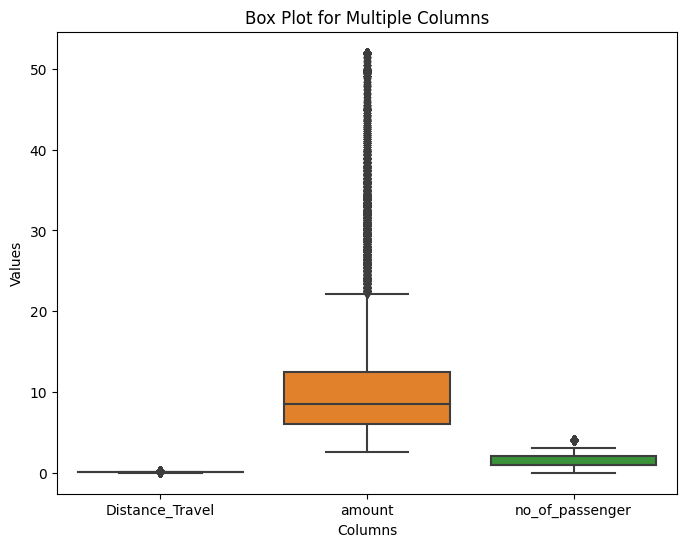

In [ ]:
columns = ['Distance_Travel', 'amount', 'no_of_passenger']
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.boxplot(data=df3[columns])
plt.title('Box Plot for Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [ ]:
#Changig the type from object to datetime.
df2["date"] = pd.to_datetime(df2["date"])

In [ ]:
#Extracting some features from date_time_of_pickup
df2["date_time_of_pickup"] = pd.to_datetime(df2["date_time_of_pickup"])
df2["hours"] = df2["date_time_of_pickup"].dt.hour
df2["min"] = df2["date_time_of_pickup"].dt.minute
df2["second"] = df2["date_time_of_pickup"].dt.second
df2["year"] = df2["date_time_of_pickup"].dt.year
df2["month_of_the_year"] = df2["date_time_of_pickup"].dt.month
df2["day_of_the_month"] = df2["date_time_of_pickup"].dt.day

In [ ]:
### converting into categorical
def time_of_day(x):
    if x in range(6,12):
        return "Morning"
    elif x in range(12,17):
        return "Afternoon"
    elif x in range(17,21):
        return "Evening"
    else:
        return "Night"


In [ ]:
df2["time_of_day"] = df2["hours"].apply(time_of_day)

In [ ]:
df2["day"] = df2["date_time_of_pickup"].dt.day_name()
df2["day_no"] = df2["date_time_of_pickup"].dt.weekday



In [ ]:
df2.Zone.unique()

array(['UTC'], dtype=object)

In [ ]:
### dropping not useful data
df2=df2.drop(['unique_id','date_time_of_pickup','date', 'Time' , "Zone" ,	'min',	'second', 'month_of_the_year'], axis=1)
df2.sample(5)

,amount,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel,hours,year,day_of_the_month,time_of_day,day,day_no
38592,16.5,1,40.754629,40.723928,-73.986492,-74.000509,0.033749,9,2012,19,Morning,Friday,4
39082,5.5,1,40.783047,40.772297,-73.957184,-73.960701,0.011311,12,2015,16,Afternoon,Monday,0
31790,4.5,1,40.727474,40.723385,-74.000510,-73.989983,0.011293,19,2013,19,Evening,Tuesday,1
1142,18.5,1,40.799952,40.753469,-73.968201,-73.970489,0.046539,21,2013,9,Night,Saturday,5
28962,8.0,2,40.786773,40.778681,-73.977775,-73.954296,0.024834,18,2013,30,Evening,Monday,0


In [ ]:
### Data Cleaning
df2 = df2.loc[df2['X1'].between(40, 42)]
df2 = df2.loc[df2['Y1'].between(-75, -72)]
df2 = df2.loc[df2['X2'].between(40, 42)]
df2 = df2.loc[df2['Y2'].between(-75, -72)]
print(f'New number of observations: {df2.shape[0]}')

New number of observations: 48944


In [ ]:
### creating minkowski_distance attribute for more accuracy
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)

In [ ]:
df2['manhattan_d'] = minkowski_distance(df2['Y1'],
                                       df2['Y2'],
                                       df2['X1'],
                                       df2['X2'], 1)

In [ ]:
### checking for encoding
df2.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   time_of_day  48944 non-null  object
 1   day          48944 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
# one hot encoding
df3 = pd.get_dummies(df2,columns=["time_of_day","day"])

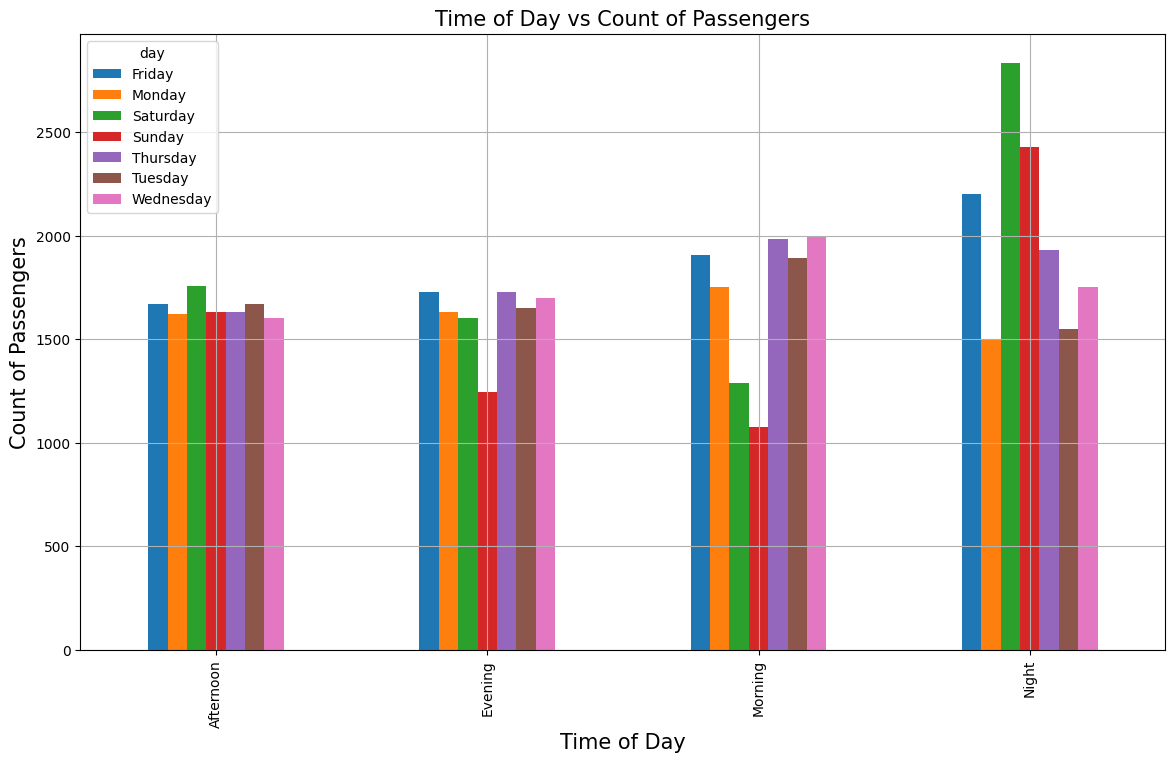

In [ ]:
df2.pivot_table(index='time_of_day', columns='day', values="no_of_passenger",aggfunc="count").plot(figsize=(14,8),kind='bar')
plt.title("Time of Day vs Count of Passengers",fontsize=(15))
plt.xlabel("Time of Day",fontsize=(15))
plt.ylabel('Count of Passengers',fontsize=(15));
plt.grid()
plt.savefig("Time_of_Day_vs_Count_of_Passengers.jpg")

In [ ]:
#dropping unusefull data
df3.drop(columns=["X1","X2","Y1","Y2"],inplace =True)


In [ ]:
### creating more attributes for detailed analysis

df3["Is_Weekend"] =np.where(df3["day_no"].isin ([0,6]),1,0)
df3["Is_starting_of_month"] = np.where(df3["day_of_the_month"].isin ([1,2,3,4,5,6,7,8,9,10]),1,0)
df3["Is_middle_of_month"] = np.where(df3["day_of_the_month"].isin (range(11,21)),1,0)
df3["Is_end_of_month"] = np.where(df3["day_of_the_month"].isin (range(21,32)),1,0)
df3["Is_leap_year"] = np.where((df3["year"]%4 == 0),1,0)

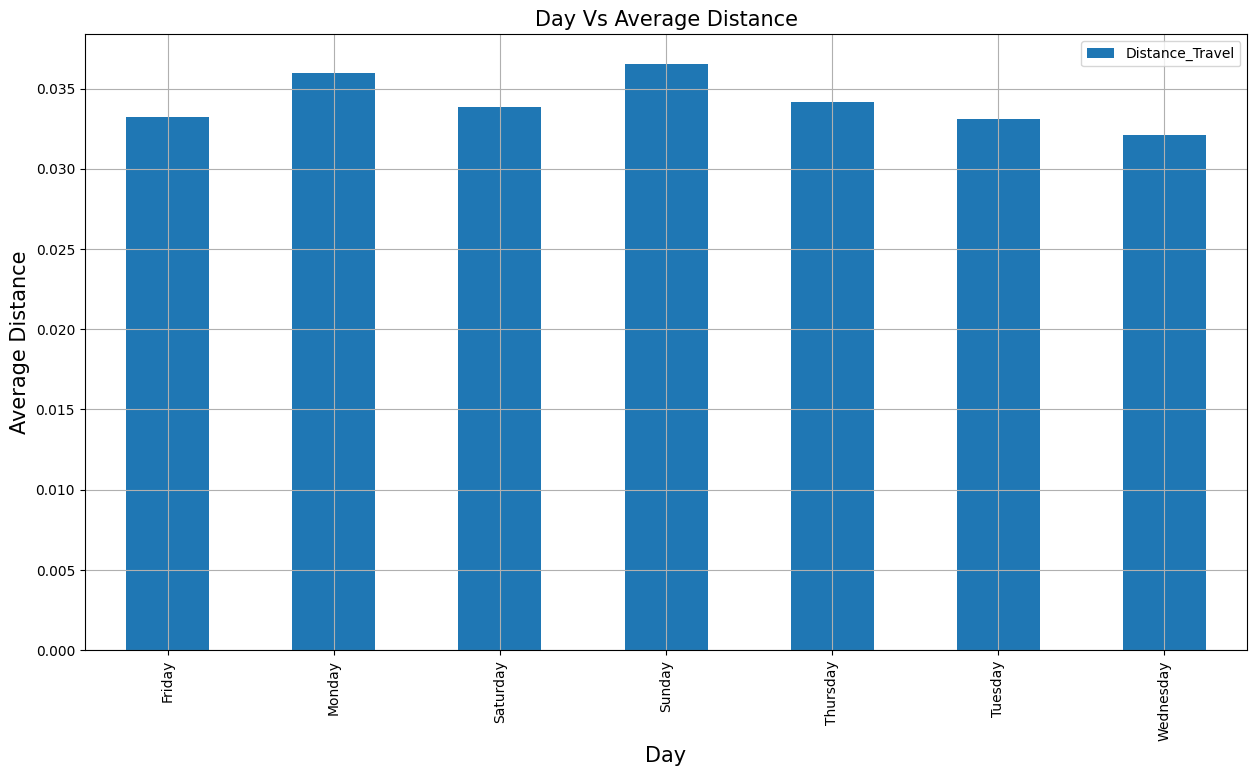

In [ ]:
df2.pivot_table(index="day",values= "Distance_Travel",aggfunc="mean").plot(figsize=(15,8),kind='bar')
plt.title("Day Vs Average Distance",fontsize=(15))
plt.xlabel("Day",fontsize=(15))
plt.ylabel('Average Distance',fontsize=(15));
plt.grid()
plt.savefig("Day Vs Average Distance.jpg")

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount                 48944 non-null  float64
 1   no_of_passenger        48944 non-null  int64  
 2   Distance_Travel        48944 non-null  float64
 3   hours                  48944 non-null  int64  
 4   year                   48944 non-null  int64  
 5   day_of_the_month       48944 non-null  int64  
 6   day_no                 48944 non-null  int64  
 7   manhattan_d            48944 non-null  float64
 8   time_of_day_Afternoon  48944 non-null  uint8  
 9   time_of_day_Evening    48944 non-null  uint8  
 10  time_of_day_Morning    48944 non-null  uint8  
 11  time_of_day_Night      48944 non-null  uint8  
 12  day_Friday             48944 non-null  uint8  
 13  day_Monday             48944 non-null  uint8  
 14  day_Saturday           48944 non-null  uint8  
 15  da

In [ ]:
### checking for strength and direction of relation
corr_data=df3.corr()

In [ ]:
### splitting input and output data
Y = df3["amount"]
X = df3.drop(columns=["amount"]) #dependent variable = amount

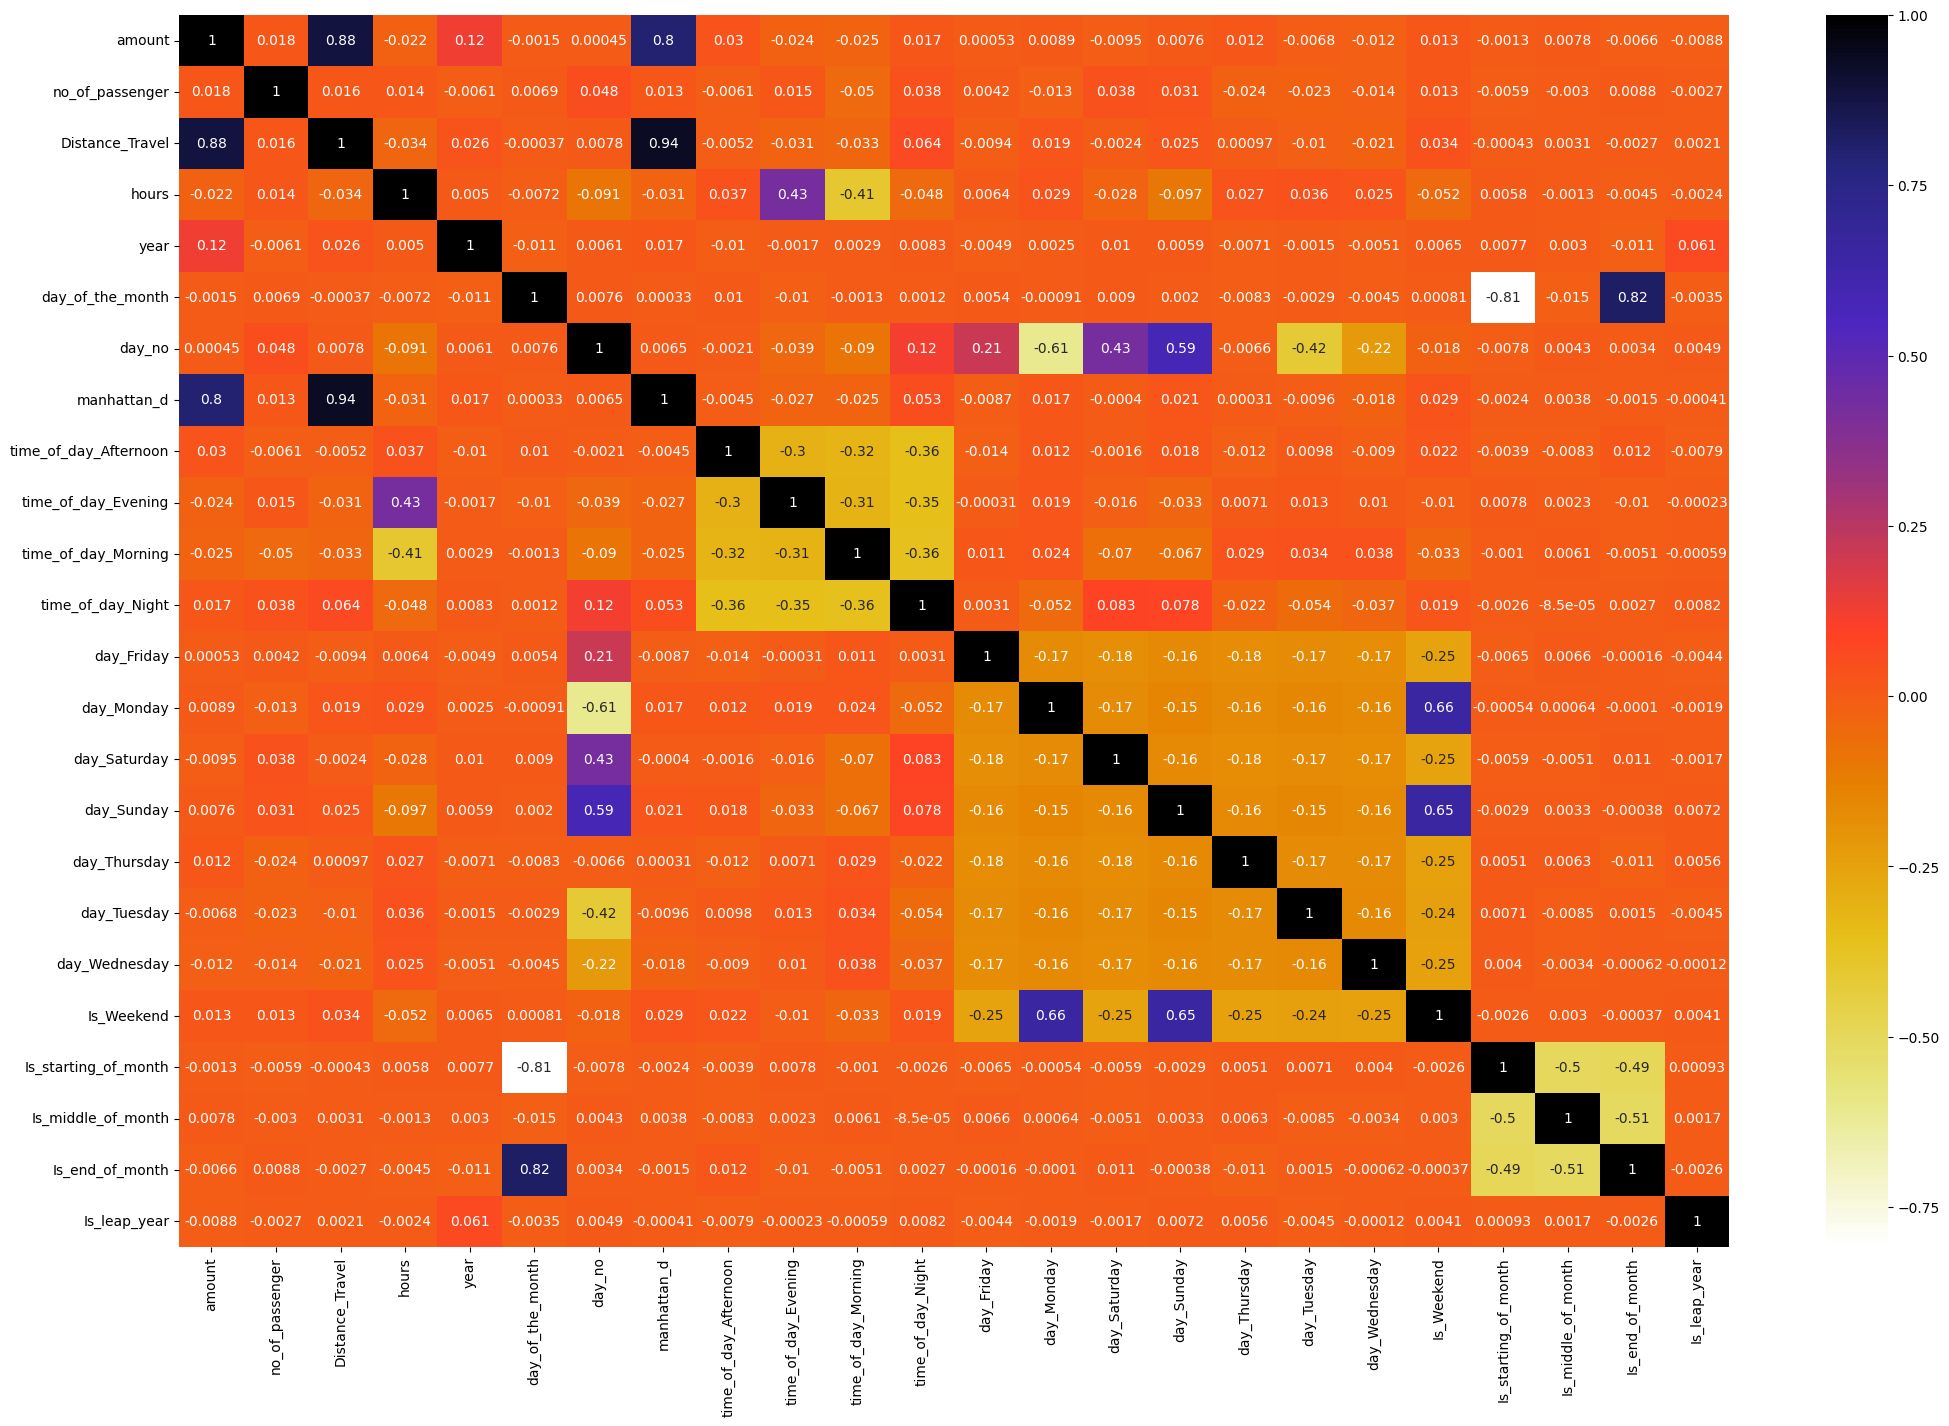

In [ ]:
#visualizing
plt.figure(figsize=(25,16))
sns.heatmap(corr_data, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
###Splittin training data(80%) & testing data(20%)
X_train,X_test,Y_train,Y_test =train_test_split(X,Y, test_size = 0.2 , random_state = 1)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39155 entries, 15614 to 33714
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   no_of_passenger        39155 non-null  int64  
 1   Distance_Travel        39155 non-null  float64
 2   hours                  39155 non-null  int64  
 3   year                   39155 non-null  int64  
 4   day_of_the_month       39155 non-null  int64  
 5   day_no                 39155 non-null  int64  
 6   manhattan_d            39155 non-null  float64
 7   time_of_day_Afternoon  39155 non-null  uint8  
 8   time_of_day_Evening    39155 non-null  uint8  
 9   time_of_day_Morning    39155 non-null  uint8  
 10  time_of_day_Night      39155 non-null  uint8  
 11  day_Friday             39155 non-null  uint8  
 12  day_Monday             39155 non-null  uint8  
 13  day_Saturday           39155 non-null  uint8  
 14  day_Sunday             39155 non-null  uint8  
 15

### Fitting with models

In [ ]:
#Fitting with linear regression
model1 = LinearRegression()

In [ ]:
model1.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model1.score(X_train,Y_train)

0.8016206360132466

In [ ]:
model1.score(X_test,Y_test)

0.7944351309801696

In [ ]:
Y_pred = model1.predict(X_test)

# Evaluate
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the evaluation metrics
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

Mean Squared Error:  16.376162454597473
R-squared:  0.7944351309801696


In [ ]:
#model 2 >> DecisionTreeRegressor

model2 = DecisionTreeRegressor()


In [ ]:
model2.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
model2.score(X_train,Y_train)

0.9999993644607224

In [ ]:
model2.score(X_test,Y_test)

0.6567684008409695

In [ ]:
Y_pred2 = model2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred2)
r2 = r2_score(Y_test, Y_pred2)

# Print the evaluation metrics
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

Mean Squared Error:  27.34327346000613
R-squared:  0.6567684008409695


In [ ]:
#model 3 >> AdaBoostRegressor
model3 = AdaBoostRegressor()

In [ ]:
model3.fit(X_train,Y_train)

AdaBoostRegressor()

In [ ]:
model3.score(X_train,Y_train)

0.6119002302712289

In [ ]:
model3.score(X_test,Y_test)

0.6002235635729709

In [ ]:
#model 4 >> GradientBoostingRegressor
model4 = GradientBoostingRegressor()

In [ ]:
model4.fit(X_train,Y_train)

GradientBoostingRegressor()

In [ ]:
model4.score(X_train,Y_train)

0.8473592511313894

In [ ]:
model4.score(X_test,Y_test)

0.8338053161237812

In [ ]:
#model 5 >> RandomForestRegressor
model5 = RandomForestRegressor()

In [ ]:
model5.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
model5.score(X_train,Y_train)

0.9756774988613274

In [ ]:
model5.score(X_test,Y_test)

0.8198484883084672

In [ ]:
Y_pred5 = model5.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred5)
r2 = r2_score(Y_test, Y_pred5)

# Print the evaluation metrics
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

Mean Squared Error:  14.351627473939907
R-squared:  0.8198484883084672


### Random Forest Got Good Fit therefore **hyperparameter tuning**

In [ ]:
model5.fit(X_train,Y_train)
print("Train RF", model5.score(X_train,Y_train))
print("Test RF",model5.score(X_test,Y_test))

Train RF 0.9758258158731931
Test RF 0.8181992980207774


In [ ]:
param = {"n_estimators":[20,50],"criterion":['squared_error'] ,"max_depth": [3,5],"min_samples_split":[2,4],
                "min_samples_leaf":[2,4]}

Grid_search = GridSearchCV(estimator = model5, param_grid=param,cv=5,verbose=1,n_jobs=-1)
Grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'], 'max_depth': [3, 5],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [20, 50]},
             verbose=1)

In [ ]:
print("Train R2", Grid_search.score(X_train,Y_train))
print("Test R2",Grid_search.score(X_test,Y_test))

Train R2 0.8277704702097112
Test R2 0.8201553455357022


In [ ]:
print("MAE of Train: ", np.mean(np.abs((Y_train-Grid_search.predict(X_train))) ))
print("MAE of Test: ", np.mean(np.abs((Y_test-Grid_search.predict(X_test))) ))
print("RMSE of Train: ", np.sqrt(np.mean((Y_train-Grid_search.predict(X_train))**2) ))
print("RMSE of Test: ", np.sqrt(np.mean((Y_test-Grid_search.predict(X_test))**2) ))

MAE of Train:  2.0756508885480485
MAE of Test:  2.112534383427169
RMSE of Train:  3.7205229997143565
RMSE of Test:  3.7851264095147052


## Therefore our model is predicting well